In [1]:
%pylab nbagg
from tvb.simulator.lab import *
from tvb.simulator.plot.phase_plane_interactive import PhasePlaneInteractive
from tvb.simulator.models.epileptorcodim3 import EpileptorCodim3
from tvb.simulator.models.epileptorcodim3 import EpileptorCodim3SlowMod
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib
   INFO  log level set to INFO


c:\users\gabriel.florea\desktop\mywork\tvb_2\tvb-library\tvb\datatypes\surfaces.py:66: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.wilson_cowan.WilsonCowan.state_variable_range = Final(field_type=<class 'dict'>, default={'E': array([0., 1.]), 'I': array([0., 1.])}, required=True)
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.stefanescu_jirsa.ReducedSetFitzHughNagumo.state_variable_range = Final(field_type=<class 'dict'>, default={'xi': array([-4.,  4.]), 'eta': array([-3.,  3.]), 'alpha': array([-4.,  4.]), 'beta': array([-3.,  3.])}, required=True)
WARNING  default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.stefanescu_jirsa.ReducedSetHindmarshRose.a = NArray(label=':math:`a`', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
WARNING  default contains values out of the declared domain. Ex 3.0 
   attribute  tvb.simulator.models.st

WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.wong_wang_exc_io_inh_i.ReducedWongWangExcIOInhI.state_variable_range = Final(field_type=<class 'dict'>, default={'S_e': array([0., 1.]), 'S_i': array([0., 1.])}, required=True)
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.linear.Linear.state_variable_range = Final(field_type=<class 'dict'>, default={'x': array([-1,  1])}, required=True)
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.hopfield.Hopfield.state_variable_range = Final(field_type=<class 'dict'>, default={'x': array([-1.,  2.]), 'theta': array([0., 1.])}, required=True)
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.epileptor.Epileptor.state_var

# Epileptor codim 3 model

The Epileptor codim 3 model, developed by Saggio et al. 2017, is a neural mass model which has a rich set of possible bursting patterns. These bursters correspond to a seizure-like state as recorded in SEEG-recordings of epileptic patients. In this tutorial we will explore a number of classes of bursting which are present in this model.

The model consists of a fast and a slow subsystem. The fast subsystem is based on a spherical unfolding of the degenerate Takens-Bogdanov bifurcation. The slow subsystem controls the parameters of the fast subsystem 
along a path on the spherical unfolding. The class of a burster is determined by which bifurcations happen at onset and offset of the oscillation, which is in turn determined by the path on the spherical unfolding.

In [2]:
Epileptorcd3 = EpileptorCodim3()

First we look at the phase plane. The default parameters of the model are setup so we have a Saddle-Node bifurcation at onset and a Saddle-Homoclinic bifucation at offset. This corresponds to bifurcations in the original Epileptor model. By adjusting the variable z, we can travel on the spherical unfolding in a predetermined path. The Saddle-Node bifurcation happens at z=0 and the Saddle Homoclinic bifurcation happens at z=0.14.

<IPython.core.display.Javascript object>


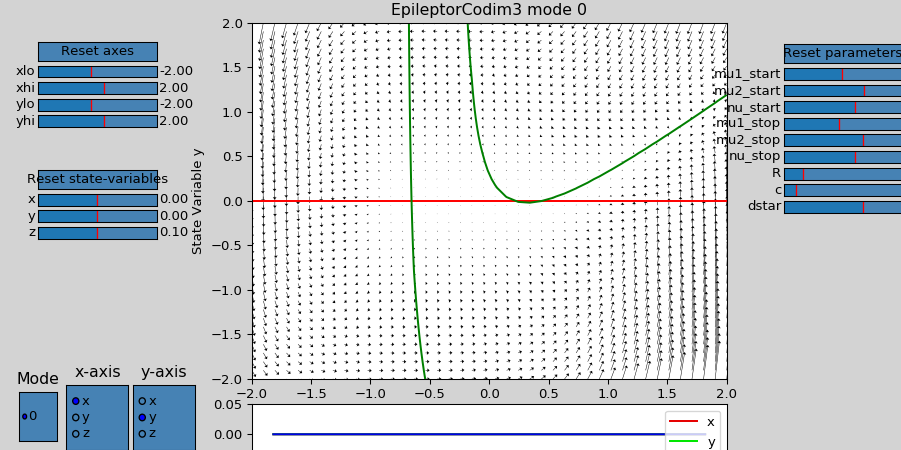

In [3]:
Epileptorcd3.state_variable_range["x"] = array([-2.0, 2.0])
Epileptorcd3.state_variable_range["y"] = array([-2.0, 2.0])
Epileptorcd3.state_variable_range["z"] = array([-0.1, 0.3])
ppi_fig = PhasePlaneInteractive(model=Epileptorcd3)
ppi_fig.show()
Epileptorcd3.state_variable_range["x"] = numpy.array([0.4, 0.6])
Epileptorcd3.state_variable_range["y"] = numpy.array([-0.1, 0.1])
Epileptorcd3.state_variable_range["z"] = numpy.array([0.0, 0.1])


Next we simulate the model to validate that the desired burster happens.

WARNING  File 'hemispheres' not found in ZIP.


<IPython.core.display.Javascript object>


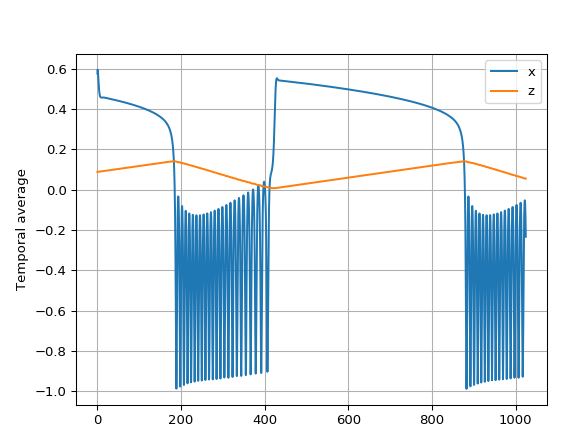

<IPython.core.display.Javascript object>


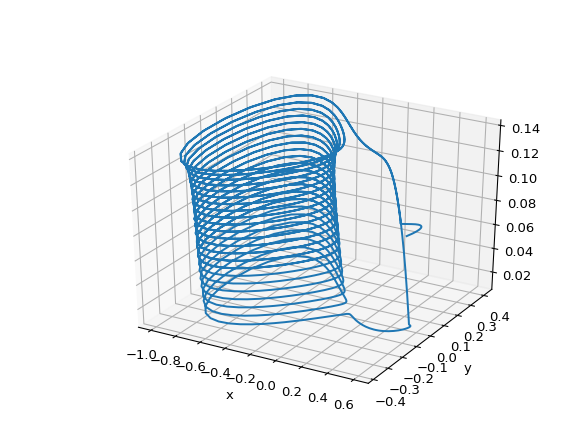

In [4]:
Epileptorcd3.variables_of_interest=['x', 'y', 'z']
sim = simulator.Simulator(
    model=Epileptorcd3,
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.0152])),
    integrator=integrators.HeunDeterministic(dt=2 ** -4),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=2 ** 10,
).configure()

(tavg_time, tavg_data), = sim.run()

figure()
plot(tavg_time, tavg_data[:, 0, 0, 0], label='x')
plot(tavg_time, tavg_data[:, 2, 0, 0], label='z')
legend()
grid(True)
xlabel('Time (ms)')
ylabel("Temporal average")
show()

fig2 = figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot(tavg_data[:, 0, 0, 0], tavg_data[:, 1, 0, 0], tavg_data[:, 2, 0, 0])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Classes of bursters

As stated earlier, the class of burster is affected by which path the bifurcation parameters take on the spherical unfolding of the degenerate Takens-Bogdanov bifurcation. These figures, from Saggio et al. 2017, show the bifurcation diagram of the deg. TB-bifurcation of the focus type. We parametrise theses paths using an arc of a great circle. 

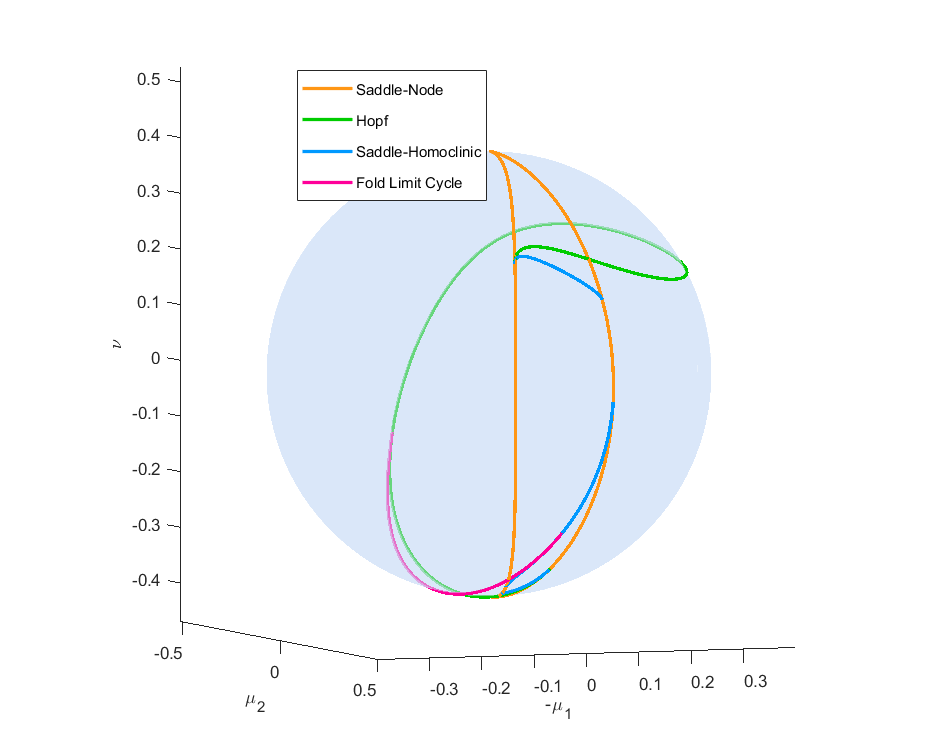
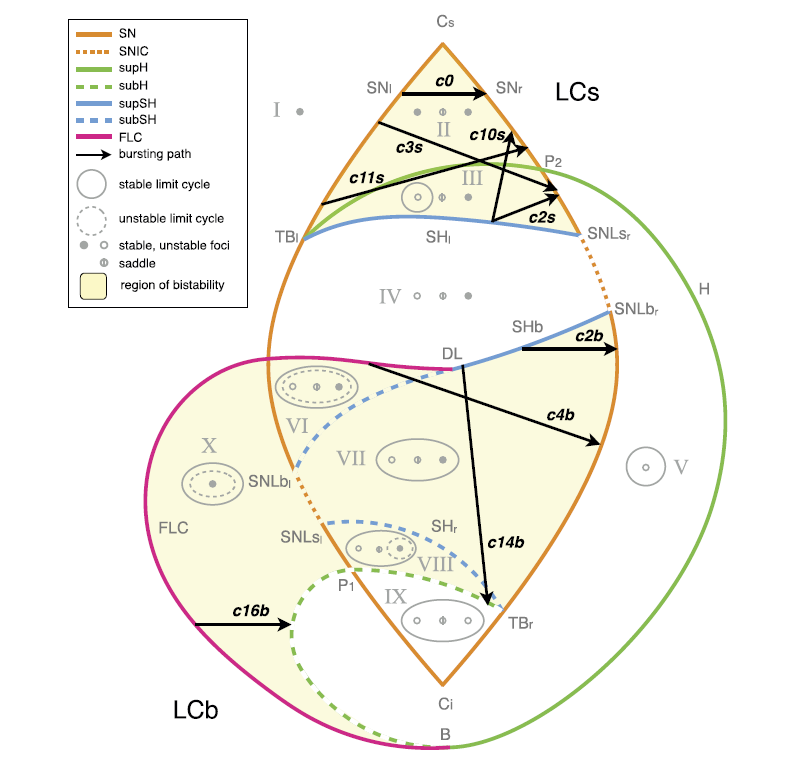

Here are the parameter settings for the bursting classes which are listed above. They are constructed by choosing the vectors A and B as the starting and end point of the arc of the great circle respectively. Note that the bursters happen at different timescales.

This is a simulation of the 'c0' class which is a Saddle-Node/Saddle-Node burster. While this class behaves like a buster, it does not contain a limit cycle during the oscillatory phase.

WARNING  File 'hemispheres' not found in ZIP.


<IPython.core.display.Javascript object>


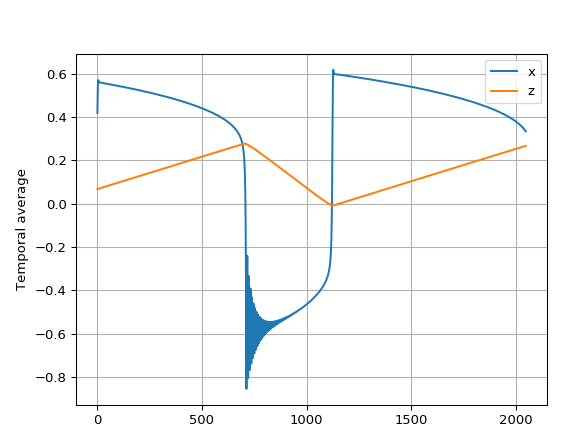

<IPython.core.display.Javascript object>


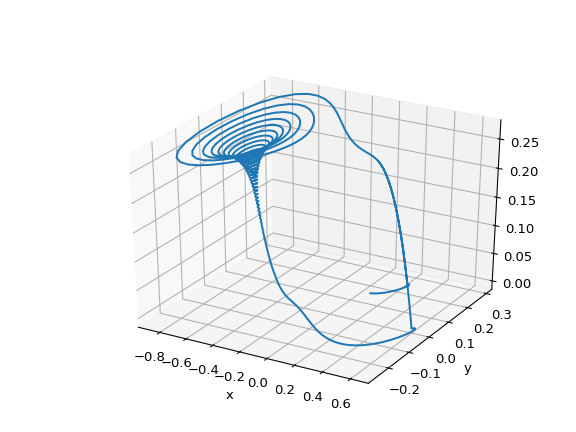

In [5]:
A = [0.2649, -0.05246, 0.2951]
B = [0.2688, 0.05363, 0.2914]
c = 0.001

sim = simulator.Simulator(
    model= EpileptorCodim3(variables_of_interest=['x', 'y', 'z'], 
                           mu1_start=numpy.array([-A[1]]), 
                           mu2_start=numpy.array([A[0]]), 
                           nu_start=numpy.array([A[2]]),
                           mu1_stop=numpy.array([-B[1]]), 
                           mu2_stop=numpy.array([B[0]]), 
                           nu_stop=numpy.array([B[2]]), 
                           c=numpy.array([c])),
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.0152])),
    integrator=integrators.HeunDeterministic(dt=2 ** -4),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=2 ** 11,
).configure()
(tavg_time, tavg_data), = sim.run()
figure()
plot(tavg_time, tavg_data[:, 0, 0, 0], label='x')
plot(tavg_time, tavg_data[:, 2, 0, 0], label='z')
legend()
grid(True)
xlabel('Time (ms)')
ylabel("Temporal average")
fig2 = figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot(tavg_data[:, 0, 0, 0], tavg_data[:, 1, 0, 0], tavg_data[:, 2, 0, 0])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
show()

This is a simulation of the 'c2s' class which is a Saddle-Node/Saddle-Homoclinic burster. This is the default setting for the Epileptor codim 3 model and is the same burster which is the basis of the original Epileptor model.

WARNING  File 'hemispheres' not found in ZIP.


<IPython.core.display.Javascript object>


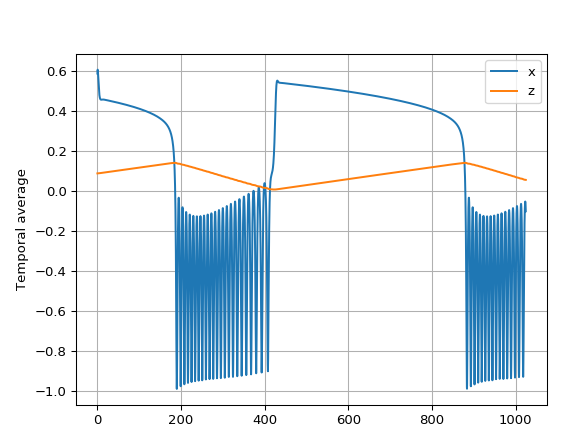

<IPython.core.display.Javascript object>


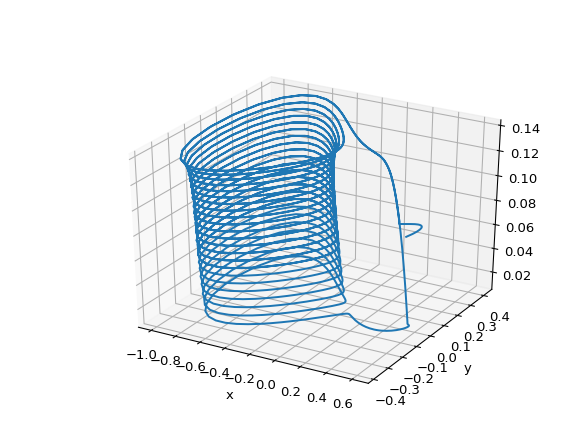

In [6]:
A = [0.3448,0.02285,0.2014]
B = [0.3351,0.07465,0.2053]
c = 0.001 

sim = simulator.Simulator(
    model= EpileptorCodim3(variables_of_interest=['x', 'y', 'z'], 
                           mu1_start=numpy.array([-A[1]]), 
                           mu2_start=numpy.array([A[0]]), 
                           nu_start=numpy.array([A[2]]),
                           mu1_stop=numpy.array([-B[1]]), 
                           mu2_stop=numpy.array([B[0]]), 
                           nu_stop=numpy.array([B[2]]), 
                           c=numpy.array([c])),
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.0152])),
    integrator=integrators.HeunDeterministic(dt=2 ** -4),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=2 ** 10,
).configure()
(tavg_time, tavg_data), = sim.run()
figure()
plot(tavg_time, tavg_data[:, 0, 0, 0], label='x')
plot(tavg_time, tavg_data[:, 2, 0, 0], label='z')
legend()
grid(True)
xlabel('Time (ms)')
ylabel("Temporal average")
fig2 = figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot(tavg_data[:, 0, 0, 0], tavg_data[:, 1, 0, 0], tavg_data[:, 2, 0, 0])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
show()

This is a simulation of the 'c3s' class which is a Saddle-Node/Supercritical Hopf burster.

WARNING  File 'hemispheres' not found in ZIP.


<IPython.core.display.Javascript object>


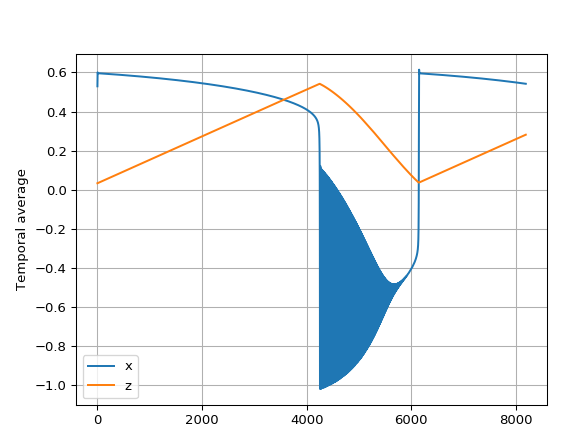

<IPython.core.display.Javascript object>


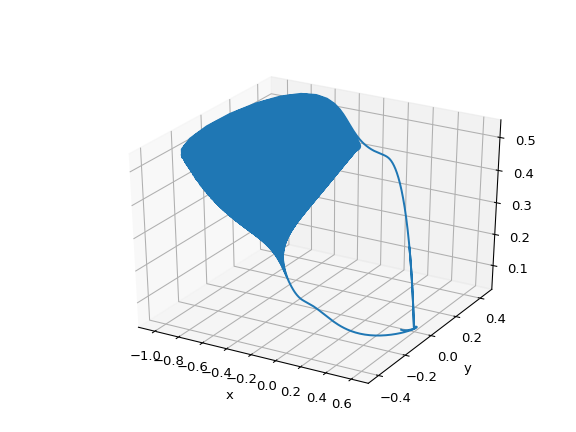

In [7]:
A = [0.2552,-0.0637,0.3014]
B = [0.3496,0.0795,0.1774]
c = 0.0004

sim = simulator.Simulator(
    model= EpileptorCodim3(variables_of_interest=['x', 'y', 'z'], 
                           mu1_start=numpy.array([-A[1]]), 
                           mu2_start=numpy.array([A[0]]), 
                           nu_start=numpy.array([A[2]]),
                           mu1_stop=numpy.array([-B[1]]), 
                           mu2_stop=numpy.array([B[0]]), 
                           nu_stop=numpy.array([B[2]]), 
                           c=numpy.array([c])),
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.0152])),
    integrator=integrators.HeunDeterministic(dt=2 ** -4),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=2 ** 13,
).configure()
(tavg_time, tavg_data), = sim.run()
figure()
plot(tavg_time, tavg_data[:, 0, 0, 0], label='x')
plot(tavg_time, tavg_data[:, 2, 0, 0], label='z')
legend()
grid(True)
xlabel('Time (ms)')
ylabel("Temporal average")
fig2 = figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot(tavg_data[:, 0, 0, 0], tavg_data[:, 1, 0, 0], tavg_data[:, 2, 0, 0])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
show()

This is a simulation of the 'c10s' class which is a Supercritical Hopf/Saddle-Homoclinic burster.

WARNING  File 'hemispheres' not found in ZIP.


<IPython.core.display.Javascript object>


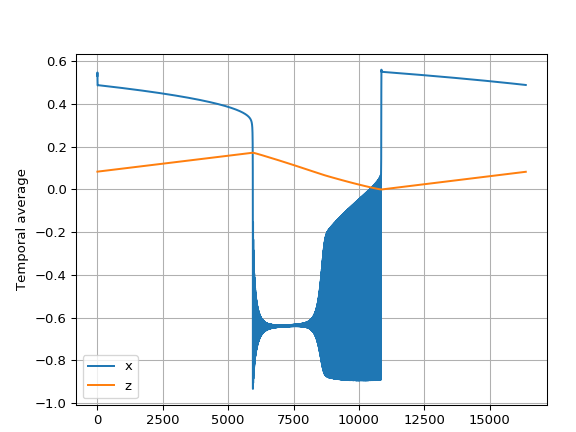

<IPython.core.display.Javascript object>


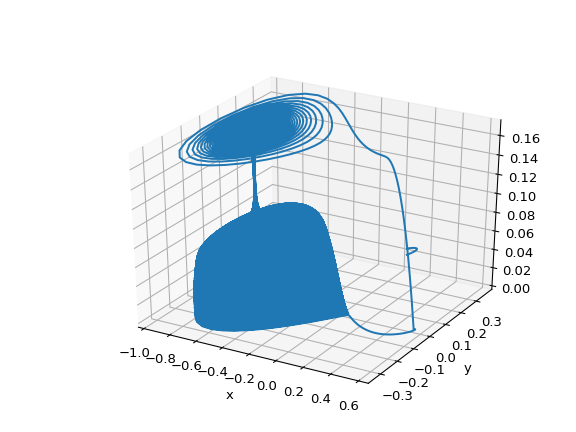

In [8]:
A = [0.3448,0.0228,0.2014]
B = [0.3118,0.0670,0.2415]
c = 0.00005 

sim = simulator.Simulator(
    model= EpileptorCodim3(variables_of_interest=['x', 'y', 'z'], 
                           mu1_start=numpy.array([-A[1]]), 
                           mu2_start=numpy.array([A[0]]), 
                           nu_start=numpy.array([A[2]]),
                           mu1_stop=numpy.array([-B[1]]), 
                           mu2_stop=numpy.array([B[0]]), 
                           nu_stop=numpy.array([B[2]]), 
                           c=numpy.array([c])),
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.0152])),
    integrator=integrators.HeunDeterministic(dt=2 ** -4),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=2 ** 14,
).configure()
(tavg_time, tavg_data), = sim.run()
figure()
plot(tavg_time, tavg_data[:, 0, 0, 0], label='x')
plot(tavg_time, tavg_data[:, 2, 0, 0], label='z')
legend()
grid(True)
xlabel('Time (ms)')
ylabel("Temporal average")
fig2 = figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot(tavg_data[:, 0, 0, 0], tavg_data[:, 1, 0, 0], tavg_data[:, 2, 0, 0])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
show()

This is a simulation of the 'c11s' class which is a Saddle-Node/Saddle-Node burster.

WARNING  File 'hemispheres' not found in ZIP.


<IPython.core.display.Javascript object>


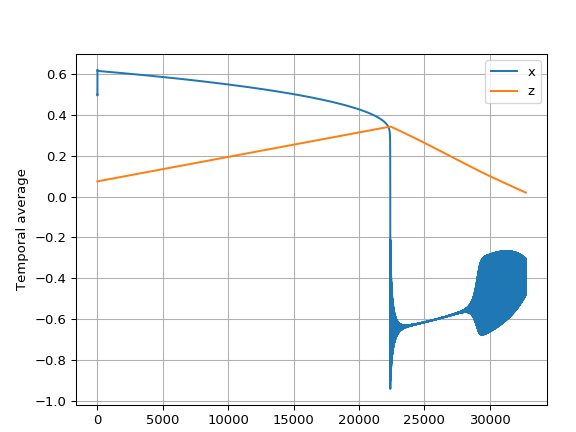

<IPython.core.display.Javascript object>


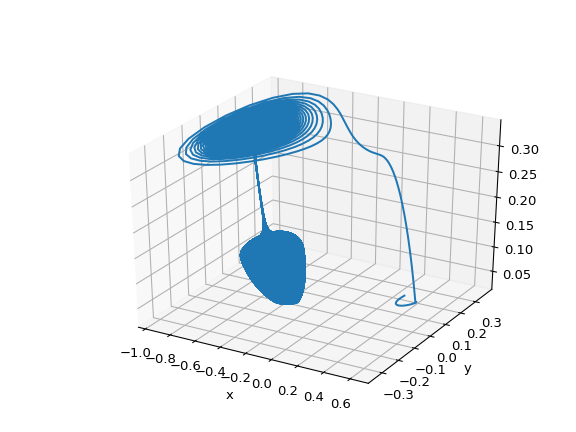

In [9]:
A = [0.3131,-0.06743,0.2396]
B = [0.3163,0.06846,0.2351]
c = 0.00004 

sim = simulator.Simulator(
    model= EpileptorCodim3(variables_of_interest=['x', 'y', 'z'], 
                           mu1_start=numpy.array([-A[1]]), 
                           mu2_start=numpy.array([A[0]]), 
                           nu_start=numpy.array([A[2]]),
                           mu1_stop=numpy.array([-B[1]]), 
                           mu2_stop=numpy.array([B[0]]), 
                           nu_stop=numpy.array([B[2]]), 
                           c=numpy.array([c])),
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.0152])),
    integrator=integrators.HeunDeterministic(dt=2 ** -4),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=2 ** 15,
).configure()
(tavg_time, tavg_data), = sim.run()
figure()
plot(tavg_time, tavg_data[:, 0, 0, 0], label='x')
plot(tavg_time, tavg_data[:, 2, 0, 0], label='z')
legend()
grid(True)
xlabel('Time (ms)')
ylabel("Temporal average")
fig2 = figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot(tavg_data[:, 0, 0, 0], tavg_data[:, 1, 0, 0], tavg_data[:, 2, 0, 0])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
show()

This is a simulation of the 'c2b' class which is a Saddle-Node/Saddle-Homoclinic burster. It is similar to the 'c2s' class, but it has a big limit cycle which encompasses the stable node.

WARNING  File 'hemispheres' not found in ZIP.


<IPython.core.display.Javascript object>


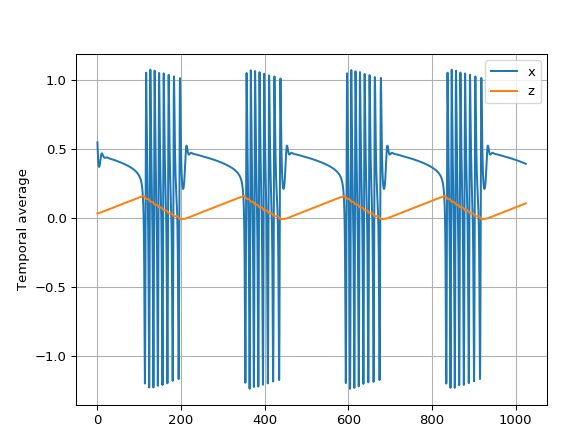

<IPython.core.display.Javascript object>


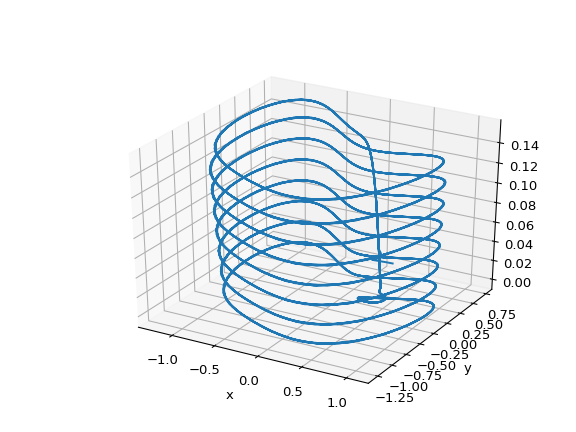

In [10]:
A = [0.3216,0.0454,-0.2335]
B = [0.285,0.05855,-0.2745]
c = 0.004 

sim = simulator.Simulator(
    model= EpileptorCodim3(variables_of_interest=['x', 'y', 'z'], 
                           mu1_start=numpy.array([-A[1]]), 
                           mu2_start=numpy.array([A[0]]), 
                           nu_start=numpy.array([A[2]]),
                           mu1_stop=numpy.array([-B[1]]), 
                           mu2_stop=numpy.array([B[0]]), 
                           nu_stop=numpy.array([B[2]]), 
                           c=numpy.array([c])),
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.0152])),
    integrator=integrators.HeunDeterministic(dt=2 ** -4),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=2 ** 10,
).configure()
(tavg_time, tavg_data), = sim.run()
figure()
plot(tavg_time, tavg_data[:, 0, 0, 0], label='x')
plot(tavg_time, tavg_data[:, 2, 0, 0], label='z')
legend()
grid(True)
xlabel('Time (ms)')
ylabel("Temporal average")
fig2 = figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot(tavg_data[:, 0, 0, 0], tavg_data[:, 1, 0, 0], tavg_data[:, 2, 0, 0])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
show()

This is a simulation of the 'c4b' class which is a Saddle-Node/Fold Limit Cycle burster with a big limit cycle.

WARNING  File 'hemispheres' not found in ZIP.


<IPython.core.display.Javascript object>


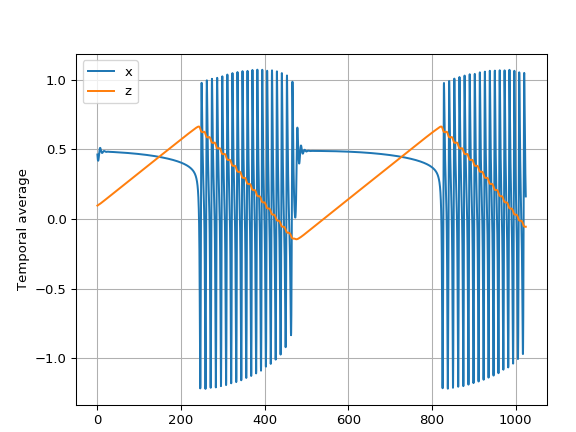

<IPython.core.display.Javascript object>


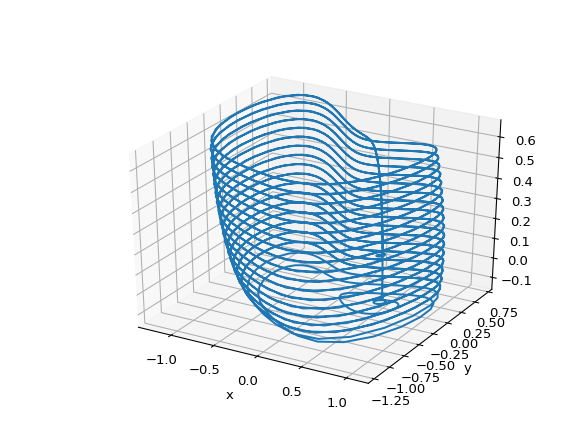

In [11]:
A = [0.1871,-0.02512,-0.3526]
B = [0.2081,-0.01412,-0.3413]
c = 0.008

sim = simulator.Simulator(
    model= EpileptorCodim3(variables_of_interest=['x', 'y', 'z'], 
                           mu1_start=numpy.array([-A[1]]), 
                           mu2_start=numpy.array([A[0]]), 
                           nu_start=numpy.array([A[2]]),
                           mu1_stop=numpy.array([-B[1]]), 
                           mu2_stop=numpy.array([B[0]]), 
                           nu_stop=numpy.array([B[2]]), 
                           c=numpy.array([c])),
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.0152])),
    integrator=integrators.HeunDeterministic(dt=2 ** -4),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=2 ** 10,
).configure()
(tavg_time, tavg_data), = sim.run()
figure()
plot(tavg_time, tavg_data[:, 0, 0, 0], label='x')
plot(tavg_time, tavg_data[:, 2, 0, 0], label='z')
legend()
grid(True)
xlabel('Time (ms)')
ylabel("Temporal average")
fig2 = figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot(tavg_data[:, 0, 0, 0], tavg_data[:, 1, 0, 0], tavg_data[:, 2, 0, 0])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
show()

This is a simulation of the 'c14b' class which is a Subcritical Hopf/Saddle-Homoclinic burster with a big limit cycle.

WARNING  File 'hemispheres' not found in ZIP.


<IPython.core.display.Javascript object>


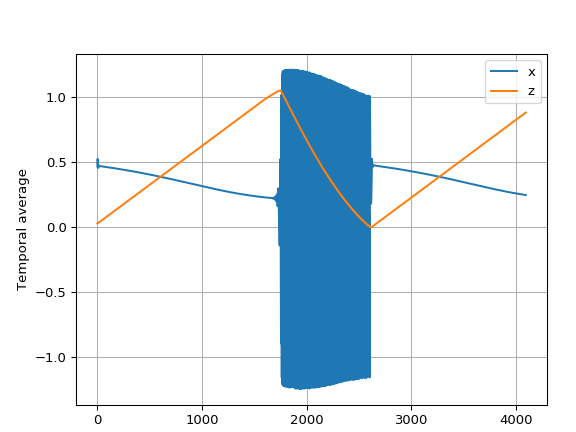

<IPython.core.display.Javascript object>


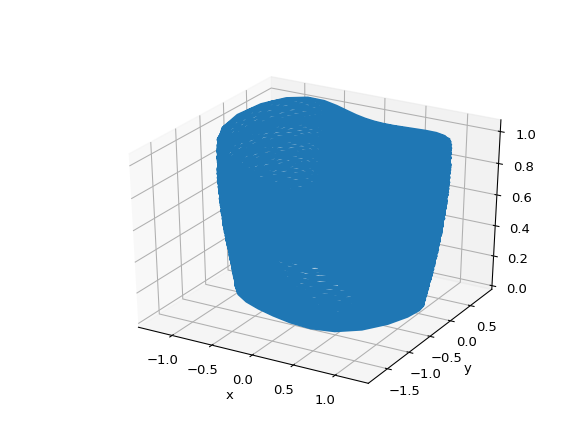

In [12]:
A = [0.3216,0.0454,-0.2335]
B = [0.106,0.005238,-0.3857]
c = 0.002 

sim = simulator.Simulator(
    model= EpileptorCodim3(variables_of_interest=['x', 'y', 'z'], 
                           mu1_start=numpy.array([-A[1]]), 
                           mu2_start=numpy.array([A[0]]), 
                           nu_start=numpy.array([A[2]]),
                           mu1_stop=numpy.array([-B[1]]), 
                           mu2_stop=numpy.array([B[0]]), 
                           nu_stop=numpy.array([B[2]]), 
                           c=numpy.array([c])),
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.0152])),
    integrator=integrators.HeunDeterministic(dt=2 ** -4),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=2 ** 12,
).configure()
(tavg_time, tavg_data), = sim.run()
figure()
plot(tavg_time, tavg_data[:, 0, 0, 0], label='x')
plot(tavg_time, tavg_data[:, 2, 0, 0], label='z')
legend()
grid(True)
xlabel('Time (ms)')
ylabel("Temporal average")
fig2 = figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot(tavg_data[:, 0, 0, 0], tavg_data[:, 1, 0, 0], tavg_data[:, 2, 0, 0])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
show()

This is a simulation of the 'c16b' class which is a Subcritical/Fold Limit Cycle burster with a big limit cycle.

WARNING  File 'hemispheres' not found in ZIP.


<IPython.core.display.Javascript object>


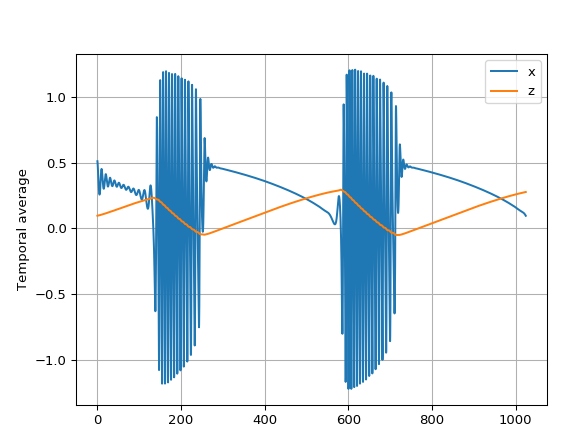

C:\Users\gabriel.florea\AppData\Local\Continuum\anaconda3\envs\tvb-run3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


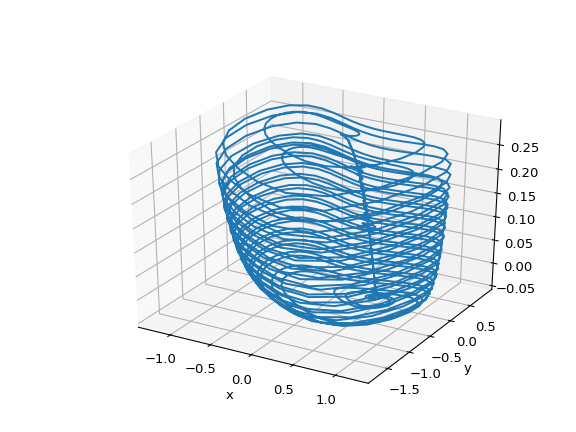

In [13]:
A = [0.04098,-0.07373,-0.391]
B = [-0.01301,-0.03242,-0.3985]
c = 0.004 

sim = simulator.Simulator(
    model= EpileptorCodim3(variables_of_interest=['x', 'y', 'z'], 
                           mu1_start=numpy.array([-A[1]]), 
                           mu2_start=numpy.array([A[0]]), 
                           nu_start=numpy.array([A[2]]),
                           mu1_stop=numpy.array([-B[1]]), 
                           mu2_stop=numpy.array([B[0]]), 
                           nu_stop=numpy.array([B[2]]), 
                           c=numpy.array([c])),
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.0152])),
    integrator=integrators.HeunDeterministic(dt=2 ** -4),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=2 ** 10,
).configure()
(tavg_time, tavg_data), = sim.run()
figure()
plot(tavg_time, tavg_data[:, 0, 0, 0], label='x')
plot(tavg_time, tavg_data[:, 2, 0, 0], label='z')
legend()
grid(True)
xlabel('Time (ms)')
ylabel("Temporal average")
fig2 = figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot(tavg_data[:, 0, 0, 0], tavg_data[:, 1, 0, 0], tavg_data[:, 2, 0, 0])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
show()

It is also possible to use spherical coördinates (R, phi, theta) to design a great circle. Here R is the radius of the sphere, phi is the azimuthal angle and theta is the polar angle. The corresponding Cartesian coördinates are (mu2,-mu1,nu)

WARNING  File 'hemispheres' not found in ZIP.


C:\Users\gabriel.florea\AppData\Local\Continuum\anaconda3\envs\tvb-run3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


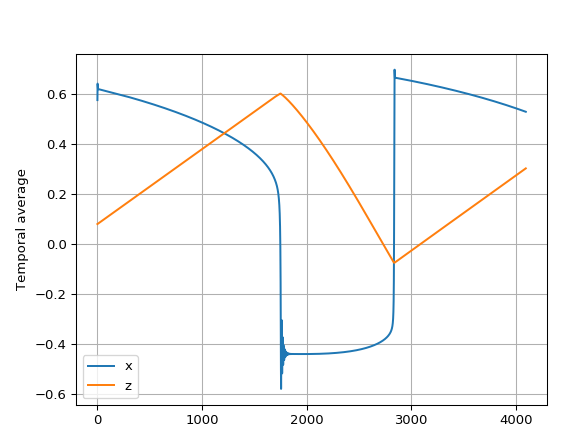

C:\Users\gabriel.florea\AppData\Local\Continuum\anaconda3\envs\tvb-run3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


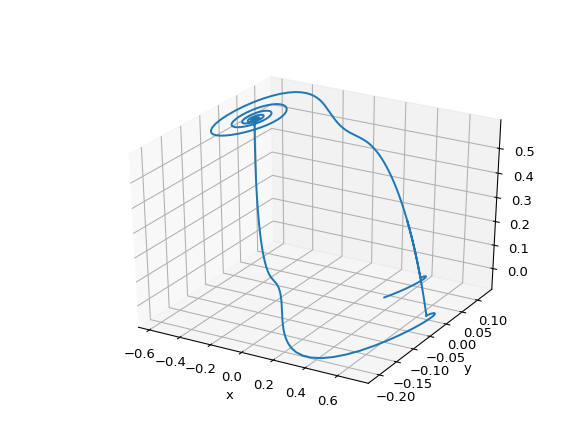

In [14]:
Epileptorcd3=EpileptorCodim3()

phi_start = -0.2
theta_start = 0.93
phi_stop = pi/4
theta_stop = 0.2
R = 0.4 #Default radius of the sphere

Epileptorcd3.mu2_start=numpy.array([R*sin(theta_start)*cos(phi_start)])
Epileptorcd3.mu1_start=numpy.array([-R*sin(theta_start)*sin(phi_start)])
Epileptorcd3.nu_start=numpy.array([R*cos(theta_start)])
Epileptorcd3.mu2_stop=numpy.array([R*sin(theta_stop)*cos(phi_stop)])
Epileptorcd3.mu1_stop=numpy.array([-R*sin(theta_stop)*sin(phi_stop)])
Epileptorcd3.nu_stop=numpy.array([R*cos(theta_stop)])
Epileptorcd3.R=numpy.array([R])
Epileptorcd3.c=numpy.array([0.001])

Epileptorcd3.variables_of_interest=['x', 'y', 'z']
sim = simulator.Simulator(
    model=Epileptorcd3,
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.0152])),
    integrator=integrators.HeunDeterministic(dt=2 ** -4),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=2 ** 12,
).configure()
(tavg_time, tavg_data), = sim.run()
figure()
plot(tavg_time, tavg_data[:, 0, 0, 0], label='x')
plot(tavg_time, tavg_data[:, 2, 0, 0], label='z')
legend()
grid(True)
xlabel('Time (ms)')
ylabel("Temporal average")
fig2 = figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot(tavg_data[:, 0, 0, 0], tavg_data[:, 1, 0, 0], tavg_data[:, 2, 0, 0])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
show()

# Epileptogenicity and modification

The value of c determines the size of the timescale separation between the slow and the fast subsystem. For timescale separation we need that c<< 1 , though it depends on the bifurcations what value of c is suitable. The epileptogenicity of the system is determined by the value of dstar. For dstar>1 (approximately) the system will get stuck in the bursting state.

The default value for dstar is 0.3 which produces the usual pattern of stability followed by bursters

WARNING  File 'hemispheres' not found in ZIP.


C:\Users\gabriel.florea\AppData\Local\Continuum\anaconda3\envs\tvb-run3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


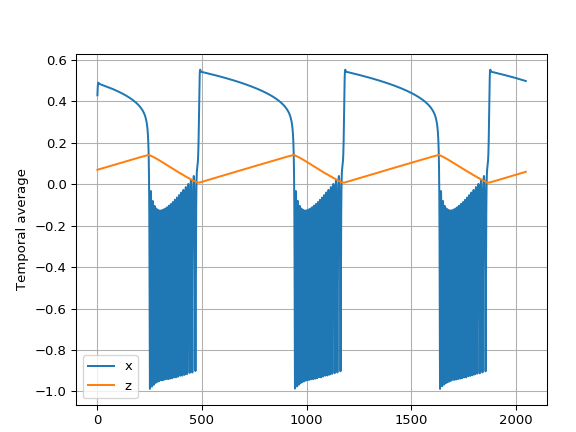

C:\Users\gabriel.florea\AppData\Local\Continuum\anaconda3\envs\tvb-run3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


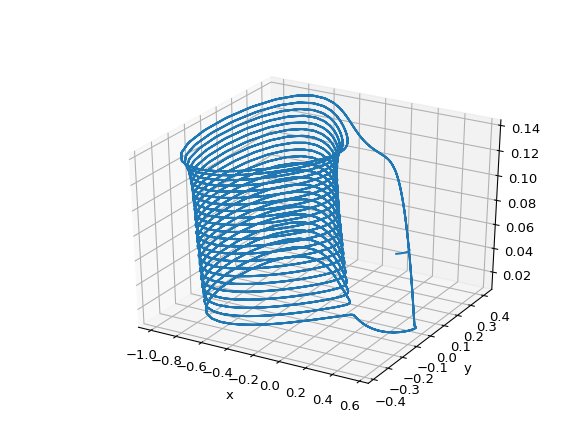

In [15]:
dstar = numpy.array([0.3])

sim = simulator.Simulator(
    model=EpileptorCodim3(dstar=dstar, variables_of_interest=['x', 'y', 'z']),
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.0152])),
    integrator=integrators.HeunDeterministic(dt=2 ** -4),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=2 ** 11,
).configure()
(tavg_time, tavg_data), = sim.run()
figure()
plot(tavg_time, tavg_data[:, 0, 0, 0], label='x')
plot(tavg_time, tavg_data[:, 2, 0, 0], label='z')
legend()
grid(True)
xlabel('Time (ms)')
ylabel("Temporal average")
fig2 = figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot(tavg_data[:, 0, 0, 0], tavg_data[:, 1, 0, 0], tavg_data[:, 2, 0, 0])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
show()

For dstar equal to 0.1 the oscillations are shorter and less frequent than the default value. Though for every positive value of dstar we still have bursting activity.

WARNING  File 'hemispheres' not found in ZIP.


C:\Users\gabriel.florea\AppData\Local\Continuum\anaconda3\envs\tvb-run3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


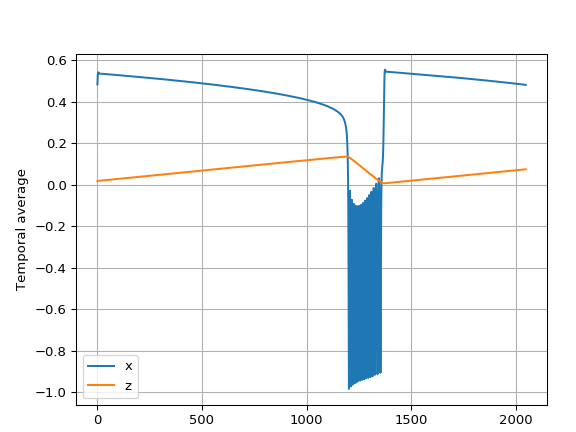

C:\Users\gabriel.florea\AppData\Local\Continuum\anaconda3\envs\tvb-run3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


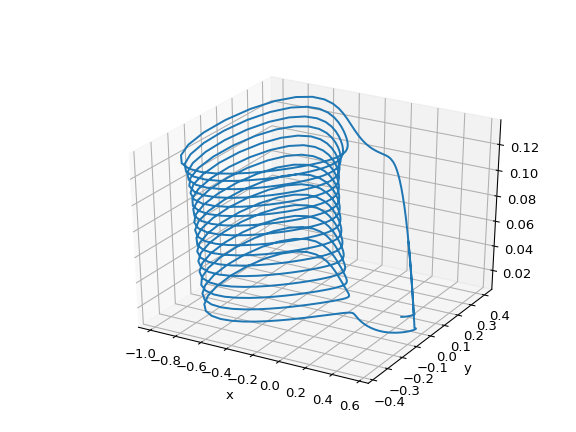

In [16]:
dstar = numpy.array([0.1])

sim = simulator.Simulator(
    model=EpileptorCodim3(dstar=dstar, variables_of_interest=['x', 'y', 'z']),
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.0152])),
    integrator=integrators.HeunDeterministic(dt=2 ** -4),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=2 ** 11,
).configure()
(tavg_time, tavg_data), = sim.run()
figure()
plot(tavg_time, tavg_data[:, 0, 0, 0], label='x')
plot(tavg_time, tavg_data[:, 2, 0, 0], label='z')
legend()
grid(True)
xlabel('Time (ms)')
ylabel("Temporal average")
fig2 = figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot(tavg_data[:, 0, 0, 0], tavg_data[:, 1, 0, 0], tavg_data[:, 2, 0, 0])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
show()

If dstar is 0 then the system remains stable.

WARNING  File 'hemispheres' not found in ZIP.


C:\Users\gabriel.florea\AppData\Local\Continuum\anaconda3\envs\tvb-run3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


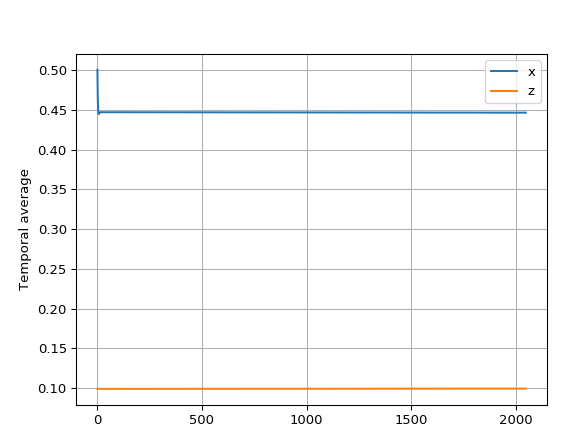

C:\Users\gabriel.florea\AppData\Local\Continuum\anaconda3\envs\tvb-run3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


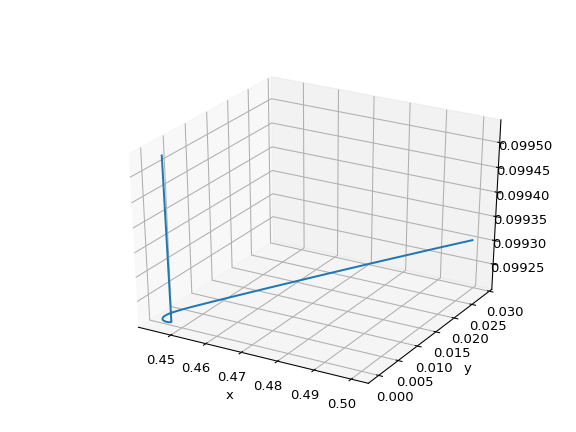

In [17]:
dstar = numpy.array([0])

sim = simulator.Simulator(
    model=EpileptorCodim3(dstar=dstar, variables_of_interest=['x', 'y', 'z']),
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.0152])),
    integrator=integrators.HeunDeterministic(dt=2 ** -4),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=2 ** 11,
).configure()
(tavg_time, tavg_data), = sim.run()
figure()
plot(tavg_time, tavg_data[:, 0, 0, 0], label='x')
plot(tavg_time, tavg_data[:, 2, 0, 0], label='z')
legend()
grid(True)
xlabel('Time (ms)')
ylabel("Temporal average")
fig2 = figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot(tavg_data[:, 0, 0, 0], tavg_data[:, 1, 0, 0], tavg_data[:, 2, 0, 0])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
show()

For dstar larger than 1 (approximately) the system will head to a indefinite oscillatory state.

WARNING  File 'hemispheres' not found in ZIP.


C:\Users\gabriel.florea\AppData\Local\Continuum\anaconda3\envs\tvb-run3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


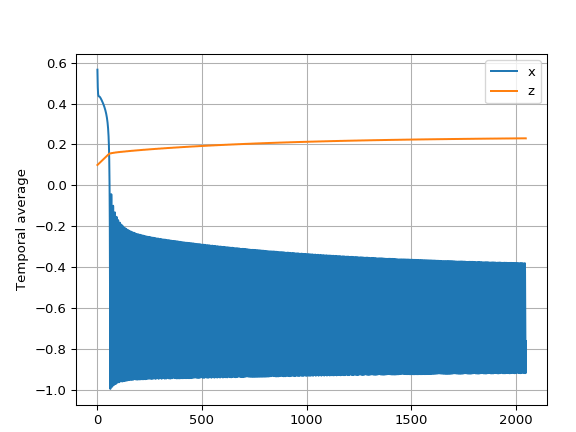

C:\Users\gabriel.florea\AppData\Local\Continuum\anaconda3\envs\tvb-run3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


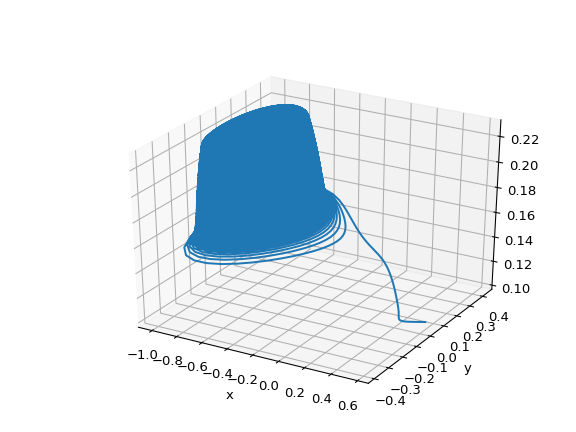

In [18]:
dstar = numpy.array([1])

sim = simulator.Simulator(
    model=EpileptorCodim3(dstar=dstar, variables_of_interest=['x', 'y', 'z']),
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.0152])),
    integrator=integrators.HeunDeterministic(dt=2 ** -4),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=2 ** 11,
).configure()
(tavg_time, tavg_data), = sim.run()
figure()
plot(tavg_time, tavg_data[:, 0, 0, 0], label='x')
plot(tavg_time, tavg_data[:, 2, 0, 0], label='z')
legend()
grid(True)
xlabel('Time (ms)')
ylabel("Temporal average")
fig2 = figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot(tavg_data[:, 0, 0, 0], tavg_data[:, 1, 0, 0], tavg_data[:, 2, 0, 0])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
show()

For a negative dstar the bifurcation parameters wraps around the great circle in the wrong direction, producing an artificial burster

WARNING  File 'hemispheres' not found in ZIP.


C:\Users\gabriel.florea\AppData\Local\Continuum\anaconda3\envs\tvb-run3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


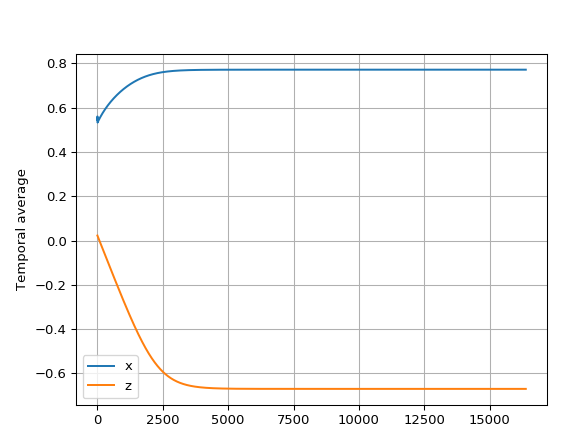

C:\Users\gabriel.florea\AppData\Local\Continuum\anaconda3\envs\tvb-run3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


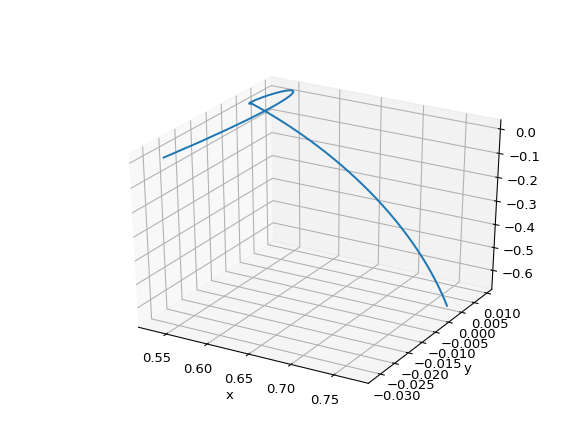

In [19]:
dstar = numpy.array([-0.3])

sim = simulator.Simulator(
    model=EpileptorCodim3(dstar=dstar, variables_of_interest=['x', 'y', 'z']),
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.0152])),
    integrator=integrators.HeunDeterministic(dt=2 ** -4),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=2 ** 14,
).configure()
(tavg_time, tavg_data), = sim.run()
figure()
plot(tavg_time, tavg_data[:, 0, 0, 0], label='x')
plot(tavg_time, tavg_data[:, 2, 0, 0], label='z')
legend()
grid(True)
xlabel('Time (ms)')
ylabel("Temporal average")
fig2 = figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot(tavg_data[:, 0, 0, 0], tavg_data[:, 1, 0, 0], tavg_data[:, 2, 0, 0])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
show()

By introducing a small modification it is possible to stabilize the system without affecting the model with a positive dstar

WARNING  File 'hemispheres' not found in ZIP.


C:\Users\gabriel.florea\AppData\Local\Continuum\anaconda3\envs\tvb-run3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


<IPython.core.display.Javascript object>


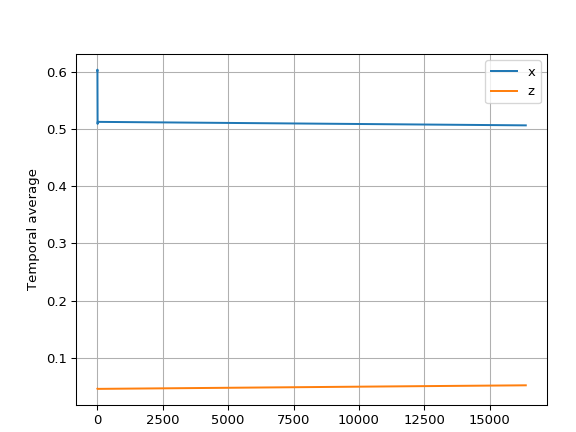

C:\Users\gabriel.florea\AppData\Local\Continuum\anaconda3\envs\tvb-run3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


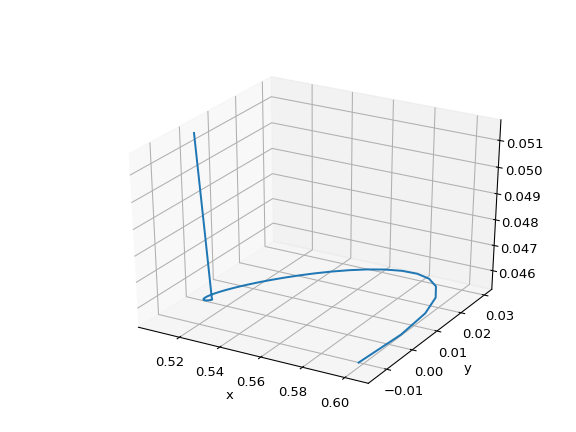

In [20]:
dstar = numpy.array([0])
modification = numpy.array([True])

sim = simulator.Simulator(
    model=EpileptorCodim3(dstar=dstar, variables_of_interest=['x', 'y', 'z'], modification=modification),
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.0152])),
    integrator=integrators.HeunDeterministic(dt=2 ** -4),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=2 ** 14,
).configure()
(tavg_time, tavg_data), = sim.run()
figure()
plot(tavg_time, tavg_data[:, 0, 0, 0], label='x')
plot(tavg_time, tavg_data[:, 2, 0, 0], label='z')
legend()
grid(True)
xlabel('Time (ms)')
ylabel("Temporal average")
fig2 = figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot(tavg_data[:, 0, 0, 0], tavg_data[:, 1, 0, 0], tavg_data[:, 2, 0, 0])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
show()

Here we see that the modification doesn't affect the generic oscillations of the system. Though note that the initial conditions are random.

WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.


C:\Users\gabriel.florea\AppData\Local\Continuum\anaconda3\envs\tvb-run3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


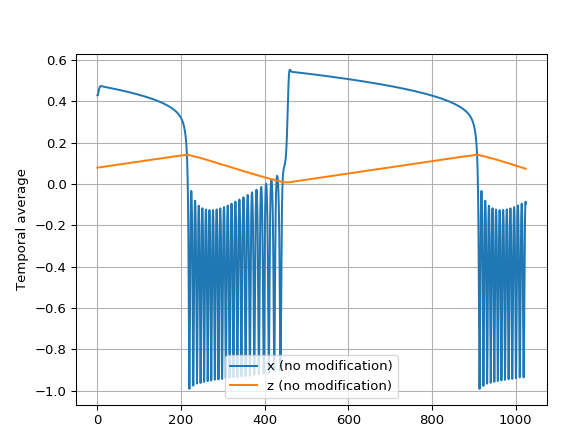

C:\Users\gabriel.florea\AppData\Local\Continuum\anaconda3\envs\tvb-run3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


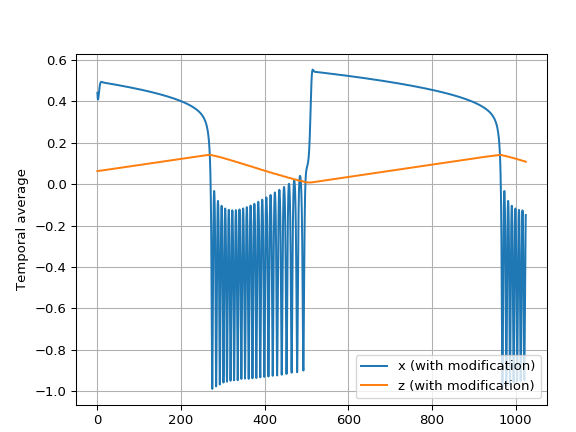

In [21]:
#Unmodified
sim = simulator.Simulator(
    model=EpileptorCodim3(),
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.0152])),
    integrator=integrators.HeunDeterministic(dt=2 ** -4),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=2 ** 10,
).configure()

#Modified
modification = numpy.array([True])
sim2 = simulator.Simulator(
    model=EpileptorCodim3(modification=modification),
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.0152])),
    integrator=integrators.HeunDeterministic(dt=2 ** -4),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=2 ** 10,
).configure()
(tavg_time, tavg_data), = sim.run()
(tavg_time2, tavg_data2), = sim2.run()

figure()
plot(tavg_time, tavg_data[:, 0, 0, 0], label='x (no modification)')
plot(tavg_time, tavg_data[:, 1, 0, 0], label='z (no modification)')
legend()
grid(True)
xlabel('Time (ms)')
ylabel("Temporal average")

figure()
plot(tavg_time2, tavg_data2[:, 0, 0, 0], label='x (with modification)')
plot(tavg_time2, tavg_data2[:, 1, 0, 0], label='z (with modification)')
legend()
grid(True)
xlabel('Time (ms)')
ylabel("Temporal average")
show()

# Ultra-slow transition of classes of bursters

By adjusting the path through the parameter space we can transition between classes of bursters. This is implemented in the EpileptorCodim3_slowmod model. Most input parameters are the same as the EpileptorCodim3 model. However the input parameters which dictate the class of burster has been modified. The offset and onset parameters are given of the initial class of burster are given by the subscript Ain and Bin respectively. The offset and onset parameters are given of the final class of burster are given by the subscript Aend and Bend respectively. 

In [22]:
EpileptorCodim3SlowMod()

The default setting corresponds to a transition from the classes c0, c11s, c10s, c2s, c2b, c4b and finally c16b. You might need to zoom in to clearly see the different bursters.

WARNING  File 'hemispheres' not found in ZIP.


C:\Users\gabriel.florea\AppData\Local\Continuum\anaconda3\envs\tvb-run3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


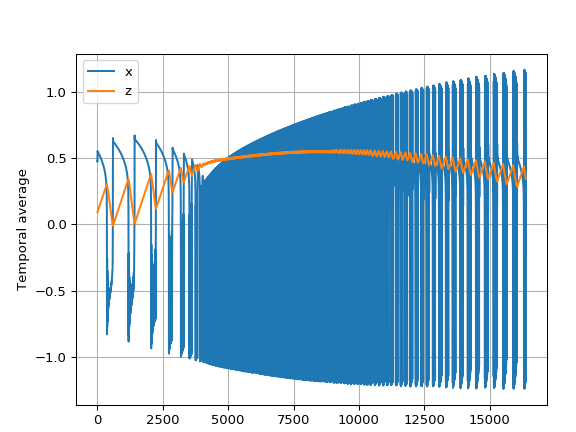

In [23]:
sim = simulator.Simulator(
    model= EpileptorCodim3SlowMod(),
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.0152])),
    integrator=integrators.HeunDeterministic(dt=2 ** -4),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=2 ** 14,
).configure()
(tavg_time, tavg_data), = sim.run()
figure()
plot(tavg_time, tavg_data[:, 0, 0, 0], label='x')
plot(tavg_time, tavg_data[:, 1, 0, 0], label='z')
legend()
grid(True)
xlabel('Time (ms)')
ylabel("Temporal average")
show()